# Table of Content

- [Project Description](#project-description)
    - [Dataset](#dataset)
    - [Report & Dashboard](#report-dashboard)
    - [Data Pre-Processing](#data-pre-processing)
        - [Import Library & Raw Dataset](#import-library-raw-dataset)
        - [Data General Checking](#data-general-checking)
        - [Data Cleaning](#data-cleaning)
        - [Handling Outlier](#handling-outlier)
    - [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
        - [Sales Trends](#sales-trends)
        - [Sales by Product](#sales-by-product)
        - [Customer Purchase Totals](#customer-purchase-totals)
    - [Statistical Hypothesis Testing](#statistical-hypothesis-testing)
        - [Product Sales Hypothesis](#product-sales-hypothesis)
        - [Purchase Frequency Hypothesis](#purchase-frequency-hypothesis)
        - [Sales Trend Hypothesis](#sales-trend-hypothesis)
    - [Conclusion](#conclusion)
        - [Recommendations](#recommendations)
        - [Report & Dashboard](#report-dashboard)
        - [Closing Remarks](#closing-remarks)

<a id="project-description"></a>
# Project Description

With the rapid advancement of e-commerce in the digital era, the speed of shopping and product production has significantly increased. This change affects market dynamics and accelerates product life cycles. Therefore, a deep understanding of product turnover is crucial to achieving maximum profit. Companies must be able to identify the right sales momentum and produce goods in the most efficient way to maximize profit potential.

In this context, analyzing e-commerce transactions that sell household items becomes highly relevant. By conducting a comprehensive analysis of transaction data, we can identify household products with high future profit potential. This analysis will include assessing sales trends, purchase frequency, and product demand patterns over a certain period.

The goal of this analysis is to determine which household products have the potential to generate profit and the best time to increase production or supply of these products. With the information obtained from this transaction analysis, the company will be able to make better strategic decisions regarding stock, promotions, and marketing strategies, as well as improve overall operational efficiency.

<a id="dataset"></a>
## Dataset

The provided dataset contains transaction history data for an online store that sells household items.

The file **[`ecommerce_dataset_us.csv`](https://drive.google.com/uc?export=download&id=1Cn0AXTqgB_DZaTyGixopuHIzTwLo60Hj)** includes the following columns: <br>
- InvoiceNo — Order ID <br>
- StockCode — Item ID <br>
- Description — Item name <br>
- Quantity — Number of items<br>
- InvoiceDate — Order date <br>
- UnitPrice — Price per item <br>
- CustomerID — Customer ID

## Report & Dashboard

This presentation is designed to summarize the results of the analysis and will be presented to stakeholders. Therefore, this report is expected to provide clear and detailed insights into the profitability potential of household products in e-commerce.

To visually present the analysis results, an interactive dashboard will be created for this project. This dashboard will serve as a comprehensive and easily accessible data visualization tool, and will include the following key elements:
- **Bar Chart for Daily Purchases**: Displays the number of daily purchases to monitor sales activity.
- **Bar Chart for Items Sold**: Illustrates the number of sales per item to identify the best-selling products.
- **Line Chart for Monthly Revenue Trends**: Shows monthly revenue trends to observe patterns of growth or decline in revenue.
- **Histogram for Purchases per Individual**: Presents the distribution of the number of purchases per customer to understand individual buying patterns.
- **Key Performance Indicators (KPIs)**: Such as total sales, total revenue, and the number of customers to provide an overview of business performance.
- **Filters for Date and Item**: Allows users to filter data based on specific time periods and products, enabling more specific and in-depth analysis.

> <a href="#report-dashboard">Click to View the Presentation and Dashboard</a>

<a id="data-pre-processing"></a>
## Data Pre-Processing

In data analysis, pre-processing is a crucial step that must be undertaken first. This step aims to understand the quality and structure of the dataset we have. Common steps in data pre-processing include:

- **Reviewing Data Structure**: Understanding the data types and attributes present.
- **Identifying Missing Values**: Detecting missing or incomplete data.
- **Data Cleaning**: Cleaning the data from errors or duplicates.
- **Handling Outliers**: Managing extreme or unusual data points.

By performing these steps, we ensure that the data used in the analysis is accurate and ready for further processing.

<a id="import-library-raw-dataset"></a>
### Import Library & Raw Dataset

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
from datetime import datetime
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

print('Succsess to importing library')

Succsess to importing library


In [ ]:
# read file csv
url = 'https://drive.google.com/uc?export=download&id=1Cn0AXTqgB_DZaTyGixopuHIzTwLo60Hj'
df = pd.read_csv(url, delimiter='\t')

# take a look the dataset
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,11/29/2018 08:26,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,11/29/2018 08:26,4.25,17850.0
7,536366,22633,HAND WARMER UNION JACK,6,11/29/2018 08:28,1.85,17850.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,11/29/2018 08:28,1.85,17850.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,11/29/2018 08:34,1.69,13047.0


<a id="data-general-checking"></a>
### Data General Checking

In [ ]:
# checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [ ]:
# findings nulls
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

From the calculations above, there are two columns that contain null values, particularly in the 'CustomerID' column.

In [ ]:
# find the description of the dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


From the statistical description, we found that the 'Quantity' column contains negative values. Additionally, the average 'UnitPrice' is around `$5`, but there is a very high maximum value. To evaluate these anomalies, we will use the standard deviation or approximately `$100` as the threshold for further analysis.

In [ ]:
# checking for minus value
df[df['Quantity'] <= 0].tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
540141,C581468,21314,SMALL GLASS HEART TRINKET POT,-10,12/06/2019 19:26,2.10,13599.0
540142,C581468,22098,BOUDOIR SQUARE TISSUE BOX,-12,12/06/2019 19:26,0.39,13599.0
540176,C581470,23084,RABBIT NIGHT LIGHT,-4,12/06/2019 19:28,2.08,17924.0
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/07/2019 09:27,2.08,16446.0
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12/07/2019 09:57,1.95,14397.0
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/07/2019 09:57,0.83,14397.0
541541,C581499,M,Manual,-1,12/07/2019 10:28,224.69,15498.0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/07/2019 11:57,10.95,15311.0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/07/2019 11:58,1.25,17315.0
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,12/07/2019 11:58,1.25,17315.0


The product with the item name 'PAPER CRAFT, LITTLE BIRDIE' seems to have a significant negative value. Typically, in e-commerce transactions, negative values result from refunded or returned items according to [*account.co.id*](https://account.co.id/mengembalikan-pembayaran-dari-customer-atas-invoice-yang-sudah-dilunasi/).

In [ ]:
# checking some of product
df[df['StockCode'] == '23843']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/07/2019 09:15,2.08,16446.0
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/07/2019 09:27,2.08,16446.0


It appears that the negative quantity for this product type is indeed due to refunds, as seen from previous purchases. Additionally, upon closer inspection, rows indicating refunded, returned, or incorrect purchases have InvoiceNo starting with the letter 'C'.

In [ ]:
# take a look the row with huge price
df[df['UnitPrice'] > 100].tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
533082,C581009,M,Manual,-1,12/05/2019 09:15,125.00,16971.0
533491,581023,DOT,DOTCOM POSTAGE,1,12/05/2019 10:35,1861.46,NaN
535003,581179,POST,POSTAGE,1,12/05/2019 15:43,240.00,12471.0
536048,581217,DOT,DOTCOM POSTAGE,1,12/06/2019 09:20,863.80,NaN
536834,581219,DOT,DOTCOM POSTAGE,1,12/06/2019 09:28,1008.96,NaN
537254,581238,DOT,DOTCOM POSTAGE,1,12/06/2019 10:53,1683.75,NaN
539368,581439,DOT,DOTCOM POSTAGE,1,12/06/2019 16:30,938.59,NaN
540908,581492,DOT,DOTCOM POSTAGE,1,12/07/2019 10:03,933.17,NaN
541540,581498,DOT,DOTCOM POSTAGE,1,12/07/2019 10:26,1714.17,NaN
541541,C581499,M,Manual,-1,12/07/2019 10:28,224.69,15498.0


Here, the oddity is that rows with UnitPrice above $100 contain descriptions that do not appear to be product or item types. We will investigate this further.

In [ ]:
# checking non product row
df[df['StockCode'].str.contains('^[a-zA-Z]+$', regex=True)]['StockCode'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [ ]:
df[df['StockCode'].isin(df[df['StockCode'].str.contains('^[a-zA-Z]+$', regex=True)]['StockCode'].unique())].drop_duplicates(subset='StockCode')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
45,536370,POST,POSTAGE,3,11/29/2018 08:45,18.000,12583.0
141,C536379,D,Discount,-1,11/29/2018 09:41,27.500,14527.0
1814,536544,DOT,DOTCOM POSTAGE,1,11/29/2018 14:32,569.770,NaN
2239,536569,M,Manual,1,11/29/2018 15:35,1.250,16274.0
14436,C537581,S,SAMPLES,-1,12/05/2018 12:03,12.950,NaN
14514,C537600,AMAZONFEE,AMAZON FEE,-1,12/05/2018 12:41,1.000,NaN
40383,539736,m,Manual,1,12/19/2018 15:18,2.550,NaN
84016,543358,DCGSSBOY,BOYS PARTY BAG,1,02/05/2019 14:04,3.290,NaN
84017,543358,DCGSSGIRL,GIRLS PARTY BAG,3,02/05/2019 14:04,3.290,NaN
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,04/13/2019 09:27,0.001,13952.0


From the analysis, we have identified several descriptions that do not seem to correspond to actual products:

1. **Manual**: Likely refers to a product manual.
2. **DOTCOM POSTAGE/POSTAGE**: Likely represents postage or stamp costs.
3. **AMAZON FEE**: Fee charged for selling on Amazon.
4. **SAMPLES**: Likely refers to product samples.
5. **CRUK Commission**: Commission for a cancer charity in the UK.
6. **Adjust bad debt**: Adjustment for bad debt.
7. **Discount**: Represents discounts applied.

Aside from "Discount," other descriptions appear to be unrelated to the product analysis and will be removed from the item codes in the data.

In [ ]:
# findings the duplicates
print(df.duplicated().sum())

5268


In [ ]:
df[df.duplicated(keep=False)].head().sort_values(by='Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,11/29/2018 11:45,2.95,17908.0
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,11/29/2018 11:45,2.10,17908.0
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,11/29/2018 11:45,4.95,17908.0
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,11/29/2018 11:45,1.25,17908.0
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,11/29/2018 11:45,1.25,17908.0


Here is a summary of the findings and the subsequent data pre-processing steps:

**Findings**
1. The dataset contains a total of 541,909 rows and 7 columns.
2. The 'InvoiceDate' and 'CustomerID' columns have not been converted to the correct data types.
3. There are missing values in two columns, particularly in 'CustomerID'.
4. Apart from discounts, descriptions that do not affect product sales will be removed.
5. There are 5,268 duplicate rows.
6. There is no column summing up sales.

**Next Steps for Data Pre-Processing**
- **Rename Columns to Lowercase**: To simplify column reading.
- **Add Sales Column**: To include the total sales per transaction.
- **Convert Data Types**:
  - 'InvoiceDate' to a datetime type.
  - 'CustomerID' to a categorical or numeric type as appropriate.
- **Add Date Columns**:
  - Add 'day', 'date', and 'year_month' columns for easier Exploratory Data Analysis (EDA).
- **Remove Duplicates**: Eliminate duplicate rows.
- **Remove Non-Sales Rows**: Exclude rows with descriptions that do not affect sales, except for 'Discount'.
- **Fill Missing Values**: Address missing values in the relevant columns.

These steps will help in cleaning the data and preparing it for further analysis.

<a id="data-cleaning"></a>
### Data Cleaning

In [ ]:
# change column name to lowercase
df.rename(columns={
    'InvoiceNo':'invoice_no',
    'StockCode':'stock_code',
    'Description':'description',
    'Quantity':'quantity',
    'InvoiceDate':'invoice_date',
    'UnitPrice':'unit_price',
    'CustomerID':'customer_id'
}, inplace=True)

In [ ]:
# add total sales
df['sales'] = df['unit_price'] * df['quantity']

In [ ]:
# conversion data type
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%m/%d/%Y %H:%M')

In [ ]:
# adding the column date, day, month

# day column
day_order = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6}

df['day'] = df['invoice_date'].dt.day_name()
df['day_of_week_num'] = df['day'].map(day_order)

# date column
df['date'] = df['invoice_date'].dt.date

# year_month
df['year_month'] = df['invoice_date'].dt.to_period('M')
df['year_month'] = df['year_month'].dt.to_timestamp()

In [ ]:
# deleting duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# delete non product rows
drop_list = ['POST', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'B', 'CRUK']
df = df[~df['stock_code'].isin(drop_list)]

In [ ]:
# fill missing value
# columns 'description'
description_mapping = df.dropna(subset=['description']).set_index('stock_code')['description'].to_dict()
df['description'] = df['description'].fillna(df['stock_code'].map(description_mapping))
df['description'] = df['description'].fillna('none')

The code above will fill the missing values in the `description` column by using the item stock ID. The code works by matching the stock item IDs and retrieving the available product descriptions, then filling the missing values with these descriptions.

Next, we will address the missing values in the 'customer_id' column.

In [ ]:
# 'customer_id' columns
existing_ids = df['customer_id'].dropna().astype(int).tolist()

def fillna_with_random_existing_id(df, column):
    existing_ids = df[column].dropna().astype(int).tolist()
    num_missing = df[column].isna().sum()

    np.random.seed(0)
    random_ids = np.random.choice(existing_ids, size=num_missing, replace=True)

    df.loc[df[column].isna(), column] = random_ids
    return df

df = fillna_with_random_existing_id(df, 'customer_id')

df['customer_id'] = df['customer_id'].astype(int).apply(lambda x: '{:05d}'.format(x))

The code fills missing values in the 'customer_id' column of the DataFrame `df` with random existing customer IDs. The `fillna_with_random_existing_id` function first collects a list of existing IDs from non-NaN 'customer_id' values and then replaces NaN values with a random ID from this list. Afterward, the 'customer_id' column is converted to a string format with five digits.

Next, we will review the cleaned DataFrame.

In [ ]:
# re-check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533993 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   invoice_no       533993 non-null  object        
 1   stock_code       533993 non-null  object        
 2   description      533993 non-null  object        
 3   quantity         533993 non-null  int64         
 4   invoice_date     533993 non-null  datetime64[ns]
 5   unit_price       533993 non-null  float64       
 6   customer_id      533993 non-null  object        
 7   sales            533993 non-null  float64       
 8   day              533993 non-null  object        
 9   day_of_week_num  533993 non-null  int64         
 10  date             533993 non-null  object        
 11  year_month       533993 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 53.0+ MB


In [ ]:
df.describe()

,quantity,invoice_date,unit_price,sales,day_of_week_num,year_month
count,533993.000000,533993,533993.000000,533993.000000,533993.000000,533993
mean,9.647351,2019-07-02 10:17:22.486587136,3.314480,18.288850,2.603869,2019-06-17 22:01:20.805553920
min,-80995.000000,2018-11-29 08:26:00,0.000000,-168469.600000,0.000000,2018-11-01 00:00:00
25%,1.000000,2019-03-26 11:34:00,1.250000,3.750000,1.000000,2019-03-01 00:00:00
50%,3.000000,2019-07-17 15:23:00,2.080000,9.840000,3.000000,2019-07-01 00:00:00
75%,10.000000,2019-10-16 17:05:00,4.130000,17.400000,4.000000,2019-10-01 00:00:00
max,80995.000000,2019-12-07 12:50:00,1867.860000,168469.600000,5.000000,2019-12-01 00:00:00
std,219.620972,NaN,6.017635,368.814369,1.609416,NaN


In [ ]:
df.duplicated().sum()

0

After handling missing values and invalid data and adding the necessary data, we'll need to perform further checks on the 'sales' column. Here's the plan:

1. **Examine the Distribution of 'Sales' Values**:
   - This step aims to understand the data distribution and visually identify potential outliers.

2. **Determine Conditions for Outliers**:
   - Based on the data distribution, thresholds for detecting outliers will be established using the Interquartile Range (IQR) method.

3. **Filter Outlier Data**:
   - After setting conditions for outliers, we will filter the data to remove or address values identified as outliers.

<a id="handling-outlier"></a>
### Handling Outlier

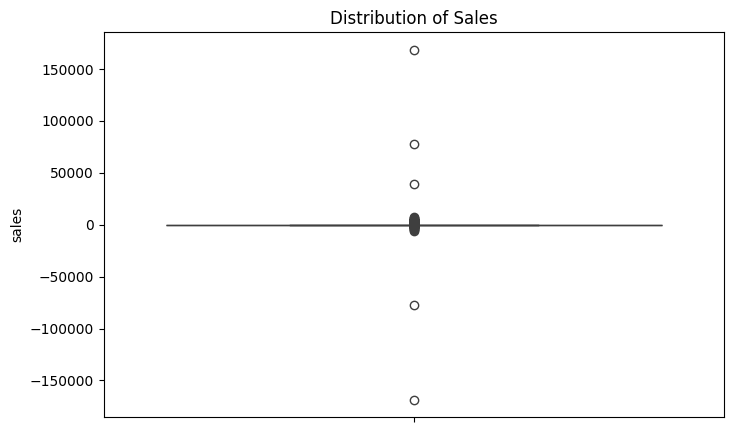

In [ ]:
# find the distribution of sales
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='sales')
plt.title(f'Distribution of Sales')
plt.show()

The graph above shows significant outliers in both columns of data. To address this, we will apply the Interquartile Range (IQR) method, or the box plot method, to systematically identify and mark the outliers.

In [ ]:
# find the outlier
def outlier_detection(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

The `outlier_detection` function is used to detect outliers in a DataFrame column using the Interquartile Range (IQR) method. Here's how it works:

1. **Calculate Q1 and Q3**: The function first calculates the first quartile (Q1) and the third quartile (Q3) of the given column.
2. **Compute IQR**: The Interquartile Range (IQR) is calculated as the difference between Q3 and Q1.
3. **Determine Outlier Bounds**: Outlier thresholds are set by subtracting 1.5 times the IQR from Q1 for the lower bound and adding 1.5 times the IQR to Q3 for the upper bound.
4. **Return Bounds**: The function returns these bounds, which can be used to identify and handle outliers in the data.

In [ ]:
# data filtering on 'sales' columns
lower_sales, upper_sales = outlier_detection(df, 'sales')
df = df[(df['sales'] >= lower_sales) & (df['sales'] <= upper_sales)]

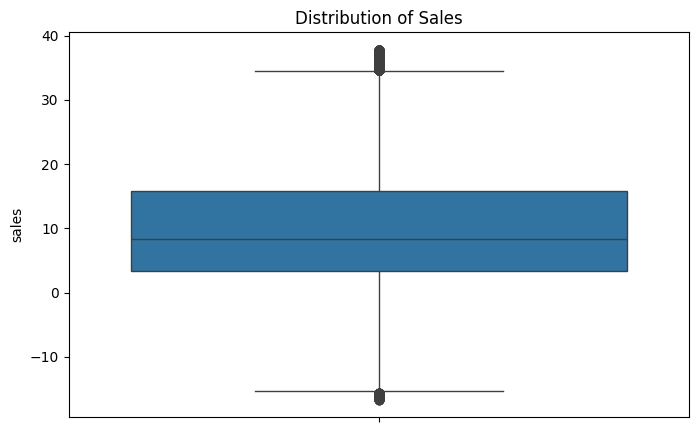

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='sales')
plt.title(f'Distribution of Sales')
plt.show()

In [ ]:
df.shape

(490045, 12)

From the original total of 533,993 rows, the dataset has now been reduced to 490,045 rows, reflecting the removal of approximately 8% of irrelevant data.

With the data now free from missing values and outliers, we will proceed to the next stage: Exploratory Data Analysis (EDA).

<a id="exploratory-data-analysis-eda"></a>
## Exploratory Data Analysis (EDA)

At this stage, our main focus is to understand the structure, patterns, and relationships within the data. Our primary goal remains to identify the most profitable products and analyze sales patterns for each product. To achieve this, we will perform the following steps:

1. **Analyze Monthly Sales Trends and Identify Common Transaction Days.**
2. **Calculate Sales Totals per Product.**
3. **Total Purchases per Customer.**

<a id="tren-penjualan"></a>
### Sales Trends


In [ ]:
# see the sales trend
# total sales monthly
total_sales_monthly = df.groupby('year_month').agg({'sales':'sum'}).reset_index()
total_sales_monthly.rename(columns={'sales':'total_sales'}, inplace=True)

# total sales daily
total_sales_daily = df.groupby('day_of_week_num').agg({'sales':'count'}).reset_index()
total_sales_daily.rename(columns={'sales':'total_transaction'}, inplace=True)

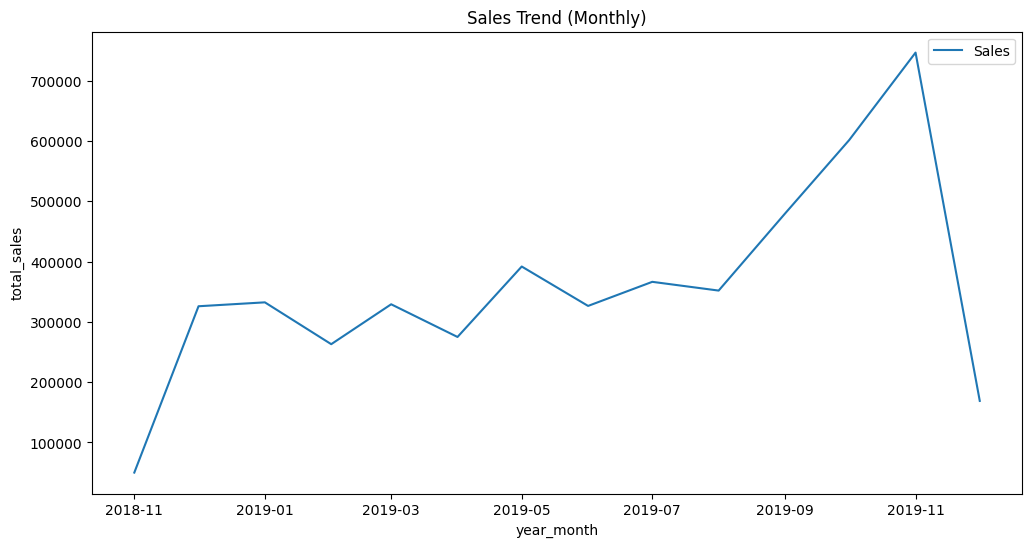

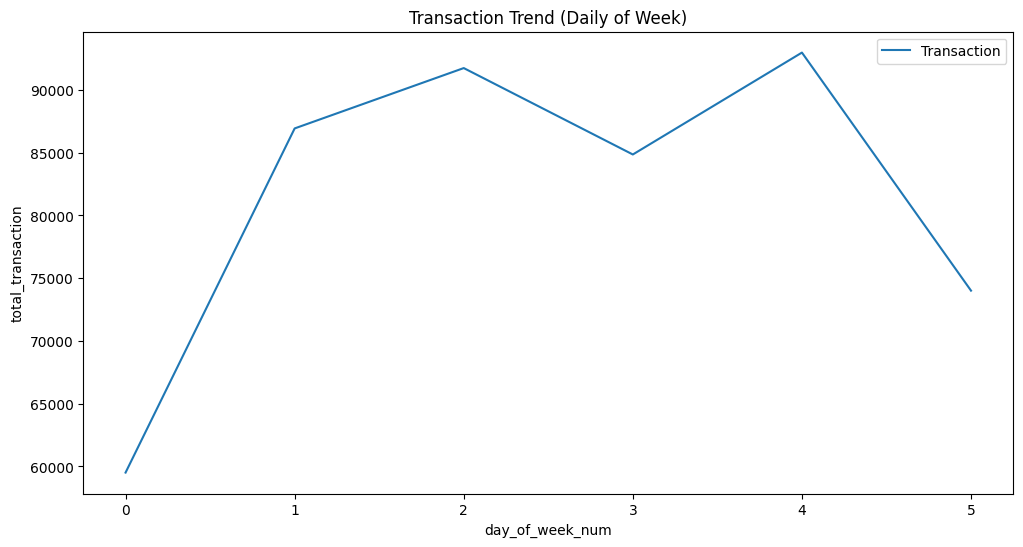

In [ ]:
# monthly sales trend
plt.figure(figsize=(12,6))
sns.lineplot(x= total_sales_monthly['year_month'],y= total_sales_monthly['total_sales'], label='Sales')
plt.title('Sales Trend (Monthly)')
plt.show()

# see what day eith the most transaction
plt.figure(figsize=(12,6))
sns.lineplot(x= total_sales_daily['day_of_week_num'],y= total_sales_daily['total_transaction'], label='Transaction')
plt.title('Transaction Trend (Daily of Week)')
plt.show()

In the monthly analysis, sales show a slight increase initially, then stabilize before rising again from August 2019 to November 2019.

Additionally, data reveals that customers tend to make purchases on Wednesdays, with a decline on Thursdays, and a resurgence on Fridays. Interestingly, there are no transactions recorded on Sundays during the dataset period.

Next, we will analyze sales by product.

<a id="penjualan-per-produk"></a>
### Sales by Product


In [ ]:
# finding the quantities of purchased product
sales = df.groupby(['stock_code', 'description', ]).agg({'quantity':'sum', 'sales':'sum'}).reset_index()
sales.sort_values(by='sales', ascending=False).head(7)

,stock_code,description,quantity,sales
4292,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9524,28972.80
4265,85099B,JUMBO BAG RED RETROSPOT,9744,22393.86
4016,84879,ASSORTED COLOUR BIRD ORNAMENT,10819,18640.59
1584,22423,REGENCY CAKESTAND 3 TIER,1355,18503.91
3328,47566,PARTY BUNTING,3437,18498.82
1623,22457,NATURAL SLATE HEART CHALKBOARD,5760,18405.76
1918,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3258,18046.56


The table above shows sales data and the number of products sold. The product with the highest sales is **WHITE HANGING HEART T-LIGHT HOLDER**, with sales exceeding $28,000. The following products are next in sales:

1. **JUMBO BAG RED RETROSPOT**
2. **ASSORTED COLOUR BIRD ORNAMENT**
3. **REGENCY CAKESTAND 3 TIER**
4. **PARTY BUNTING**
5. **NATURAL SLATE HEART CHALKBOARD**
6. **SET OF 3 CAKE TINS PANTRY DESIGN**

To facilitate the analysis, we will create visualizations illustrating both sales and the quantity of products sold.

In [ ]:
# creating function
def subplots(df1, df2, x1, x2, y, title1, title2):
    plt.figure(figsize=(14, 6))

    # Subplot 1:
    plt.subplot(1, 2, 1)
    sns.barplot(data=df1 ,  x=x1, y=y)
    plt.title(title1)

    # Subplot 2:
    plt.subplot(1, 2, 2)
    sns.barplot(data=df2, x=x2, y=y)
    plt.title(title2)

    plt.tight_layout()
    plt.show()

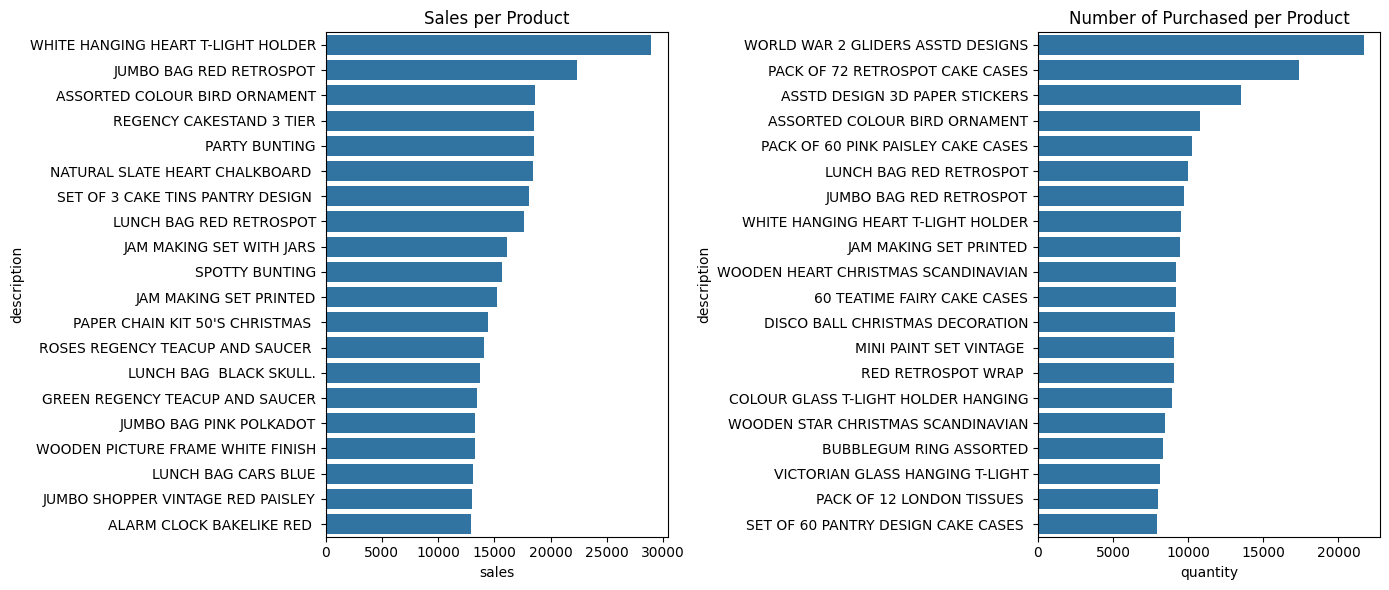

In [ ]:
# show the top product
subplots(df1=sales.nlargest(20, 'sales'),
         df2=sales.nlargest(20, 'quantity'),
         x1='sales',
         x2='quantity',
         y='description',
         title1='Sales per Product',
         title2='Number of Purchased per Product')

The product with the highest sales is `WHITE HANGING HEART T-LIGHT HOLDER`, which recorded total sales exceeding $28,000. On the other hand, the most frequently purchased product is `WORLD WAR 2 GLIDERS ASSTD DESIGNS`, which are cardboard airplane toys.

As the next step, we will analyze the total purchases per customer.

<a id="melihat-total-pembelian-pelanggan"></a>
### Customer Purchase Totals

In [ ]:
# finding the average purchased
avg_sales = df.groupby('customer_id').agg({
            'quantity':'sum',
            'sales':'sum',
            'invoice_no':'count'
            }
        ).reset_index().sort_values(by='sales', ascending=False)
avg_sales.head()

,customer_id,quantity,sales,invoice_no
1872,14911,56038,97642.83,7024
3986,17841,24008,52994.48,10267
1281,14096,16039,52725.73,6531
327,12748,16922,33500.80,5768
561,13089,18957,31035.77,2018


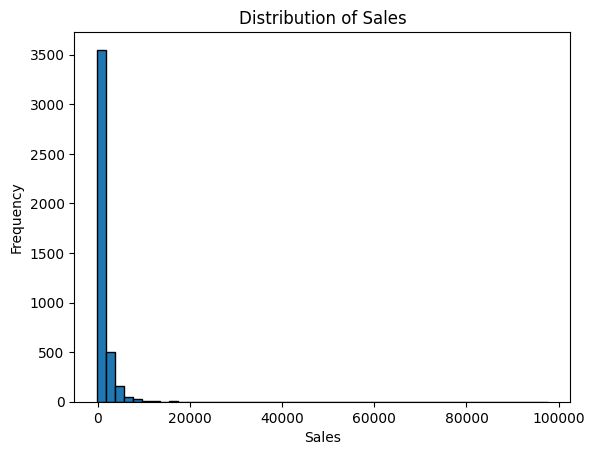

In [ ]:
# find the distribution of sales per customer
plt.hist(avg_sales['sales'], bins=50, edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Sales')

Based on the histogram, the total purchases per customer typically average around $1,000, with an average of approximately 600 units purchased. Furthermore, each customer performs at least about 100 transactions during the dataset period. This implies that the majority of frequently purchased items are likely to be single-use or short-term use products.

Before proceeding with statistical hypothesis testing, we will first formulate our hypotheses.

<a id="uji-hipotesis-statistik"></a>
## Statistical Hypothesis Testing

Based on the project's analysis, our main objective is to determine the frequency, sales, and periods when products will yield maximum profit. To achieve this, we will apply the following statistical hypothesis tests:

1. **Product Sales Hypothesis**

From the previous graph, we observed a significant surge in sales starting in August 2019, peaking in November 2019. We will test whether daily sales from August 2019 to November 2019 exceed `$20,000`:
   - **Null Hypothesis (H0):** Daily sales exceed `$20,000`.
   - **Alternative Hypothesis (H1):** Daily sales are below `$20,000`.

2. **Purchase Frequency Hypothesis**

Considering we have over 490,000 transaction rows during the dataset period, we will assume that daily transactions exceed 1,000. The hypothesis is:
   - **Null Hypothesis (H0):** Daily purchase frequency exceeds 20,000 transactions.
   - **Alternative Hypothesis (H1):** Daily purchase frequency is below 20,000 transactions.

3. **Sales Trend Hypothesis**

Since the dataset shows a significant sales spike towards the end of the year, we will compare sales in Q2 2019 with Q4 2019 to see if there is a significant difference. The hypothesis is:
   - **Null Hypothesis (H0):** Daily sales in Q2 are not significantly different from Q4.
   - **Alternative Hypothesis (H1):** Daily sales in Q2 are significantly different from Q4.

<a id="hipotesis-penjualan-produk"></a>
### Product Sales Hypothesis

Since our goal is to determine whether the observed values significantly differ from the expected values, we will use a one-sample one-tailed t-test as the appropriate statistical method. This test will help us assess whether our sample data deviates significantly from the hypothesized values.

In [ ]:
# grouping daily sales
daily_sales = df.groupby('date').agg({'sales':'sum'}).reset_index()
daily_sales['date'] = pd.to_datetime(daily_sales['date'])

# take the order from August 2019 to November 2019
daily_sales = daily_sales[(daily_sales['date'] >= '2019-08-01') & (daily_sales['date'] <= '2019-11-30')]
daily_sales.head()

,date,sales
195,2019-08-01,16352.21
196,2019-08-02,18034.10
197,2019-08-03,12902.22
198,2019-08-05,4869.52
199,2019-08-06,14187.94


In [ ]:
# t-test
expected_value = 20000
alpha = 0.05

t_statistic, p_value = stats.ttest_1samp(daily_sales['sales'], expected_value)

print('P-value:', p_value/2)

if (p_value / 2 < alpha) and (daily_sales['sales'].mean() < expected_value):
    print('Reject the null hypothesis: Significant difference in daily product sales. Daily sales are less than $20,000')
else:
    print('Fail to reject the null hypothesis: No significant difference in daily product sales, daily sales are more than $20,000')


P-value: 0.10558990711228723
Fail to reject the null hypothesis: No significant difference in daily product sales, daily sales are more than $20,000


As stated, daily sales from August 2019 to November 2019 did not exceed $20,000. We will accept the result of this statistical test and proceed to the next hypothesis.

<a id="hipotesis-frekuensi-pembelian"></a>
### Purchase Frequency Hypothesis

Since we are using a single sample from the dataset and seeking to determine a one-tailed statistical result, we will use a one-sample one-tailed t-test as our testing method.

In [ ]:
# calculate daily transaction
daily_transactions = df.groupby('year_month').agg({'sales':'count'})
daily_transactions.rename(columns={'sales':'transactions'}, inplace=True)
daily_transactions.head()

,transactions
year_month,
2018-11-01,4637
2018-12-01,33517
2019-01-01,34756
2019-02-01,24435
2019-03-01,32170


In [ ]:
# t-test
expected_value = 20000
alpha = 0.05

t_statistic, p_value = stats.ttest_1samp(daily_transactions['transactions'], expected_value)

print('P-value:', p_value/2)

if (p_value / 2 < alpha) and (daily_transactions['transactions'].mean() < expected_value):
    print('Reject the null hypothesis: Daily transactions are not more than 20,000')
else:
    print('Fail to reject the null hypothesis: Daily transactions are more than 20,000')


P-value: 0.0031033551921921167
Fail to reject the null hypothesis: Daily transactions are more than 20,000


The daily transactions exceeding 20,000 are substantial for household product transactions. We accept this result and will now proceed with the final statistical test, which is the Sales Trend Hypothesis.

<a id="hipotesis-tren-penjualan"></a>
### Sales Trend Hypothesis

Since we will be comparing the average sales between two samples (Q2 and Q4), we will use the paired t-test as our statistical method. This test is appropriate for comparing the means of two related groups.

In [ ]:
# grouping the Q2 sales and Q4 sales
df['kuartal'] = df['year_month'].dt.to_period('Q')
df_q1_and_q4 = df[df['kuartal'] > '2018Q4']

q2 = df_q1_and_q4[df_q1_and_q4['kuartal'] == '2019Q2']
q4 = df_q1_and_q4[df_q1_and_q4['kuartal'] == '2019Q4']

q2_sales = q2.groupby('date').agg({'sales':'sum'}).reset_index()
q4_sales = q4.groupby('date').agg({'sales':'sum'}).reset_index()

In [ ]:
# t-test
alpha = 0.05

t_statistic, p_value = stats.ttest_ind(q2_sales['sales'], q4_sales['sales'], equal_var=False)

print('P-value:', p_value/2)

if p_value < alpha:
    print('Reject the null hypothesis: Daily sales in the second quarter are significantly different from the fourth quarter')
else:
    print('Fail to reject the null hypothesis: Daily sales in the second quarter are not significantly different from the fourth quarter')

P-value: 1.5599638384176674e-18
Reject the null hypothesis: Daily sales in the second quarter are significantly different from the fourth quarter


It turns out that sales in the second quarter differ significantly from those in the fourth quarter. With this, we have completed all statistical hypothesis tests. We will discuss the results obtained in the conclusion section.

<a id="kesimpulan"></a>
## Conclusion

**1. Monthly Period**

- **EDA Analysis**: Sales showed a slight increase initially, then stabilized before rising again from August 2019 to November 2019.
- **Hypothesis Testing**:
  - **Result**: Daily sales from August 2019 to November 2019 did not exceed $20,000. We accept this result and will proceed to the next hypothesis.

**2. Daily Purchase Frequency**

- **EDA Analysis**: Customers tend to make purchases on Wednesdays, with a decrease on Thursdays, and a rise again on Fridays. There were no transactions on Sundays during the dataset period.
- **Hypothesis Testing**:
  - **Result**: Daily transactions exceed 20,000, which is quite significant for household product transactions. We accept this result and will proceed with the final statistical test, which is the Sales Trend Hypothesis.

**3. Quarterly Sales Trend**

- **EDA Analysis**: Daily sales in the second quarter differ significantly from those in the fourth quarter.
- **Hypothesis Testing**:
  - **Result**: Sales in the second quarter differ significantly from those in the fourth quarter. With this, we have completed all statistical hypothesis tests. The results will be discussed in the conclusion section.

**4. Products**
  - Most frequently purchased items are single-use or short-term use products.

<a id="rekemendasi"></a>
### Recommendations


**1. Optimize Monthly Marketing Strategy**
- Increase marketing activities from August to November to capitalize on the period of rising sales.

**2. Daily Promotion Strategy**
- Focus promotions on Wednesdays and Fridays to maximize sales.
- Develop strategies to attract customers on Thursdays.

**3. Focus on Best-Selling Products**
- Consider increasing stock and variety of products with the highest sales.
- Create promotional packages involving top-selling products to further boost sales.

By following these recommendations, the company can enhance overall business performance and respond more effectively to identified sales trends and purchasing patterns.

## <a id="report-dashboard"></a>Report dan Dashboard

For readers who may not be familiar with the technical aspects of the code, this report presents the analysis results and recommendations in a more accessible format without requiring technical knowledge of code or analysis tools such as Jupyter Notebook. Here are the Presentation and Dashboard:

> [E-commerce Analysis Presentation: Product Variance]() <br>
> [Product Variance Dashboard on E-commerce](https://public.tableau.com/views/ProdukSalesDashboard/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

**What’s Included in This Report and Dashboard:**

1. **Presentation File:**
    - **Summary of Key Findings:** Explanation of sales trends, purchasing patterns, and top-selling products.
    - **Strategic Recommendations:** Suggestions for optimizing marketing strategies, promotions, and product management.
    - **Data Visualizations:** Charts and tables illustrating sales and purchase frequency to simplify understanding complex information.

2. **Dashboard:**
    - **Interactive Graphics:** Dynamic visualizations allowing for interactive data exploration, including sales charts, purchase frequency, and other key metrics to facilitate understanding of complex information.

<a id="kata-penutup"></a>
### Closing Remarks


With the completion of this analysis, we have identified several key insights into sales patterns and customer purchasing behavior. These findings provide a solid foundation for making strategic decisions that can enhance business performance and capitalize on market opportunities more effectively.

[Back to Top](#project-description)